# Taller 2: Clasificación de Imagenes Ejemplo TensorFlow

Con este tutorial de TensorFlow pretendemos mirar el comportamiento de una CNN simple.


<div class="alert alert-block alert-info">
<b>Integrantes</b> <br>
&nbsp;&nbsp; • Daniel Andrade <br>
&nbsp;&nbsp; • Gabriel Cubides <br>
&nbsp;&nbsp; • Dewith Miramón <br>
&nbsp;&nbsp; • Santiago Prado <br>
</div>

#### Import the libraries

In [12]:
# Data
import numpy as np
import pandas as pd
import random

# Visualization 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lcmap
import seaborn as sns
plt.style.use('fivethirtyeight')
palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Deep Learning
import tensorflow as tf
from keras import models 
from keras import layers
from keras.layers import Dropout, Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models


##### DATASET
A continuacion un resumen de como esta compuesto el dataset **CIFAR10** de Tensorflow



| ITEM NAME        | VALUES  |
|:----------------:|--------:|
| Images           |  60.000 |
| Classes          |    10   |
| Images x Class   |   6000  |
| Train Images     |  50.000 |
| Test Images      | 10.0000 |
|                  |         |


cargamos y normalizamos la data ... 

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


## Data Exploration


Comprobamos que nuestro set haya sido normalizado exitosamente

In [9]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [23]:
print('Train Images')
print('Train Images Shape ', train_images.shape)
print(f'Train images min(): {train_images.min()} max(): {train_images.max()}')

print('\nTest Images')
print('Test Images Shape ', test_images.shape)
print(f'Test images min(): {test_images.min()} max(): {test_images.max()}')

Train Images
Train Images Shape  (50000, 32, 32, 3)
Train images min(): 0.0 Train Images max(): 1.0

Test Images
Test Images Shape  (10000, 32, 32, 3)
Test images min(): 0.0 Test Images max(): 1.0


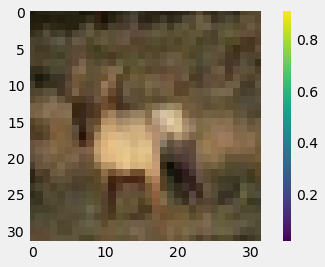

In [14]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()


### Verifying the Data

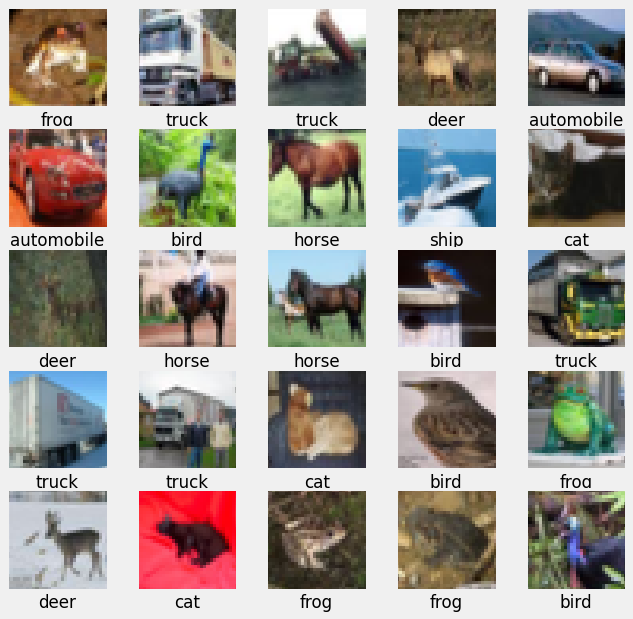

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Creating the CNN (Convoluional Network)

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


## First Architecture

A continuacion probaremos el modelo con los datos brindados por 





In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5385 - accuracy: 0.4362 - val_loss: 1.2664 - val_accuracy: 0.5459
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1634 - accuracy: 0.5872 - val_loss: 1.0578 - val_accuracy: 0.6289
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0109 - accuracy: 0.6437 - val_loss: 0.9996 - val_accuracy: 0.6473
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9087 - accuracy: 0.6824 - val_loss: 0.9387 - val_accuracy: 0.6682
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8291 - accuracy: 0.7104 - val_loss: 0.9620 - val_accuracy: 0.6662
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7739 - accuracy: 0.7286 - val_loss: 0.8739 - val_accuracy: 0.6945
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7224 - accuracy: 0.7462 - val_loss: 0.9840 - val_accuracy

### Evaluate the model

313/313 - 1s - loss: 0.9110 - accuracy: 0.7089 - 712ms/epoch - 2ms/step


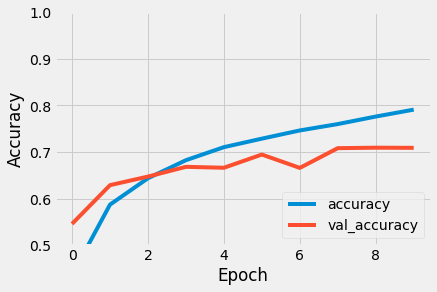

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [31]:
print(test_acc)

0.708899974822998


## Second Architecture

We are gonna use:


*   Optimizer: Adamax
*   1 Max Pooling
*   1 Aditional layer of 64 neurons
*   15 Epochs





In [51]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Add Dense layers on top

In [52]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

### Summary

In [53]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_11 (Dense)            (None, 64)                589888    
                                                      

### Compile and train the model

In [54]:
model2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5203 - accuracy: 0.4509 - val_loss: 1.2671 - val_accuracy: 0.5500
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1494 - accuracy: 0.5928 - val_loss: 1.0618 - val_accuracy: 0.6279
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9649 - accuracy: 0.6632 - val_loss: 1.0084 - val_accuracy: 0.6414
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8475 - accuracy: 0.7048 - val_loss: 0.9141 - val_accuracy: 0.6854
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7599 - accuracy: 0.7375 - val_loss: 0.8426 - val_accuracy: 0.7101
Epoch 6/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6823 - accuracy: 0.7629 - val_loss: 0.8133 - val_accuracy: 0.7195
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6088 - accuracy: 0.7888 - val_loss: 0.8280 - val_accuracy

### Evaluate the model

313/313 - 1s - loss: 1.2395 - accuracy: 0.7136 - 839ms/epoch - 3ms/step


Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


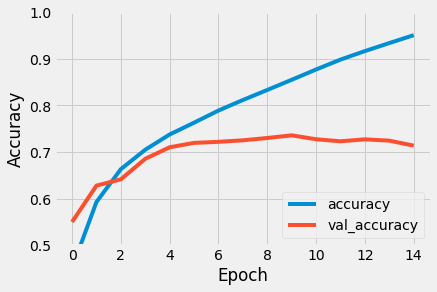

In [55]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

## Third Architecture

We are gonna use:

*   Optimizer: RMSprop
*   2 Max Pooling
*   2 Aditional layer (each one of 32)
*   12 Epochs

In [44]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Add Dense layers on top

In [45]:
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(10))

### Summary

In [46]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

### Compile and train the model

In [47]:
model3.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6362 - accuracy: 0.4070 - val_loss: 1.2944 - val_accuracy: 0.5355
Epoch 2/12
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2125 - accuracy: 0.5716 - val_loss: 1.1258 - val_accuracy: 0.5990
Epoch 3/12
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0343 - accuracy: 0.6374 - val_loss: 1.1794 - val_accuracy: 0.6013
Epoch 4/12
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9240 - accuracy: 0.6798 - val_loss: 0.9881 - val_accuracy: 0.6560
Epoch 5/12
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8460 - accuracy: 0.7058 - val_loss: 1.1137 - val_accuracy: 0.6204
Epoch 6/12
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7827 - accuracy: 0.7314 - val_loss: 0.8757 - val_accuracy: 0.7031
Epoch 7/12
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7266 - accuracy: 0.7510 - val_loss: 0.8868 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.0597 - accuracy: 0.7073 - 739ms/epoch - 2ms/step


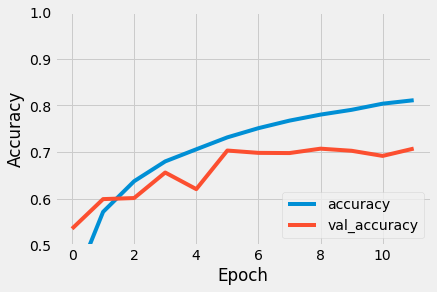

In [50]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

## Conclusions

* Las CNN son especialmente diseñadas para extraer caracteristicas y reconocer patrones visuales, lo cual quiere decir que al momento de trabajr con imagenes archivos o audio tendremos una buena aliada

* El pooling es una operacion especial que ayuda a que la clasificacion de la imagen sea mucho mejor al reducirla al las caracteristicas esenciales de la misma

* Las CNN son muy faciles de entrenar y debido a su gran set de caracteristicas nos permite tomar una gran ventaja para mejorar nuestros modelos y facilitar nuestras tareas

* Se debe tener especial cuidado con la cantidad de filtros que se escojan debido a que esto puede aumentar la complejidad de la CNN y por ende el gasto computacional puede llegar a ser muy alto e innecesario

* Es crucial siempre el realizar una inspeccion grafica de nuestros modelos para poder evitar el overfitting o underfitting 

* Comprobamos que el adam en realidad es uno de los mejores optimizadores para este tipo de problemas, sin embargo sus pares no se quedan atras (rmspropr, adamax), sin embargo al momento de elegir siempre es mejor opcion el 'adam'

* Recordar que siempre es importarte aplanar(flatten), la data antes de ingresarlos en el (dense layer)

* Es importante sabes que el (mask/filter) siempre es conveniente tenerlo en numeros impares ya que se facilitar encontrar la mitad de la (mask/filter)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5f66870-babf-4238-8476-084f8c5ee74a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>